In [33]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import geopandas as gpd

from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import pydotplus
from IPython.display import Image 
import seaborn as sns

In [4]:
import fnmatch
import os

cluster_list = [file for file in os.listdir('.') if fnmatch.fnmatch(file, 'cluster' + '*.csv')]
len(cluster_list)

29

In [5]:
df0 = pd.read_csv(cluster_list[0], index_col=0)
df0.rename({'label': cluster_list[0][7:-4]}, axis='columns', inplace=True)
print(df0.shape)
df0.head()

(137, 2)


,zipcode,DOF_Property_Owner_Issue
0,11213,3
1,11212,0
2,11225,5
3,11218,0
4,11226,5


In [6]:
for i in range(1,29):
    df_temp = pd.read_csv(cluster_list[i], index_col=0)
    df_temp.rename({'label': cluster_list[i][7:-4]}, axis='columns', inplace=True)
    print(df_temp.shape)
    df0 = df0.merge(df_temp, how='outer', on='zipcode')

(168, 2)
(248, 2)
(159, 2)
(164, 2)
(159, 2)
(176, 2)
(144, 2)
(173, 2)
(197, 2)
(171, 2)
(136, 2)
(223, 2)
(158, 2)
(158, 2)
(124, 2)
(142, 2)
(171, 2)
(167, 2)
(124, 2)
(248, 2)
(248, 2)
(152, 2)
(123, 2)
(180, 2)
(166, 2)
(63, 2)
(248, 2)
(248, 2)


In [7]:
df0.head()

,zipcode,DOF_Property_Owner_Issue,Building_Use,_yel,PLUMBING,Street_Light_Condition,Damaged_Tree,Noise_Residential,Traffic_Signal_Condition,Sidewalk_Condition,...,APPLIANCE,_petit_larceny,_drugs,ELECTRIC,SCRIE,Street_Condition,Rodent,_citibike,_robbery,_fhv
0,11213,3.0,0.0,1.0,0.0,1.0,3.0,0.0,1.0,1.0,...,3.0,3.0,0.0,1.0,1.0,0.0,1.0,NaN,13.0,0.0
1,11212,0.0,0.0,0.0,0.0,1.0,10.0,1.0,0.0,1.0,...,0.0,14.0,0.0,1.0,4.0,0.0,1.0,NaN,5.0,0.0
2,11225,5.0,1.0,1.0,0.0,1.0,6.0,1.0,1.0,1.0,...,0.0,4.0,0.0,1.0,4.0,0.0,1.0,4.0,5.0,0.0
3,11218,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,0.0,10.0,0.0,1.0,4.0,0.0,1.0,NaN,13.0,1.0
4,11226,5.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,...,0.0,14.0,0.0,1.0,4.0,0.0,1.0,NaN,13.0,0.0


In [8]:
df0.shape

(249, 30)

In [9]:
df_tar = pd.read_csv('gentrification.csv', index_col=0)
df_tar.head()

,zipcode,gentrification
0,83,2
1,7020,2
2,7030,2
3,7114,2
4,10000,2


In [10]:
df_tar.shape

(237, 2)

In [11]:
df = pd.merge(df0, df_tar, on='zipcode')
df.head()

,zipcode,DOF_Property_Owner_Issue,Building_Use,_yel,PLUMBING,Street_Light_Condition,Damaged_Tree,Noise_Residential,Traffic_Signal_Condition,Sidewalk_Condition,...,_petit_larceny,_drugs,ELECTRIC,SCRIE,Street_Condition,Rodent,_citibike,_robbery,_fhv,gentrification
0,11213,3.0,0.0,1.0,0.0,1.0,3.0,0.0,1.0,1.0,...,3.0,0.0,1.0,1.0,0.0,1.0,NaN,13.0,0.0,1
1,11212,0.0,0.0,0.0,0.0,1.0,10.0,1.0,0.0,1.0,...,14.0,0.0,1.0,4.0,0.0,1.0,NaN,5.0,0.0,1
2,11225,5.0,1.0,1.0,0.0,1.0,6.0,1.0,1.0,1.0,...,4.0,0.0,1.0,4.0,0.0,1.0,4.0,5.0,0.0,1
3,11218,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,10.0,0.0,1.0,4.0,0.0,1.0,NaN,13.0,1.0,2
4,11226,5.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,...,14.0,0.0,1.0,4.0,0.0,1.0,NaN,13.0,0.0,2


In [12]:
df.shape

(225, 31)

In [13]:
ind_cols = df.columns[1:-1]
df[ind_cols] = df[ind_cols].fillna(df[ind_cols].max()+1)

In [14]:
df.to_csv("final.csv")

In [15]:
X = df.iloc[:, 1:-1]
X.head()

,DOF_Property_Owner_Issue,Building_Use,_yel,PLUMBING,Street_Light_Condition,Damaged_Tree,Noise_Residential,Traffic_Signal_Condition,Sidewalk_Condition,MasterCard,...,APPLIANCE,_petit_larceny,_drugs,ELECTRIC,SCRIE,Street_Condition,Rodent,_citibike,_robbery,_fhv
0,3.0,0.0,1.0,0.0,1.0,3.0,0.0,1.0,1.0,2.0,...,3.0,3.0,0.0,1.0,1.0,0.0,1.0,5.0,13.0,0.0
1,0.0,0.0,0.0,0.0,1.0,10.0,1.0,0.0,1.0,0.0,...,0.0,14.0,0.0,1.0,4.0,0.0,1.0,5.0,5.0,0.0
2,5.0,1.0,1.0,0.0,1.0,6.0,1.0,1.0,1.0,0.0,...,0.0,4.0,0.0,1.0,4.0,0.0,1.0,4.0,5.0,0.0
3,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,...,0.0,10.0,0.0,1.0,4.0,0.0,1.0,5.0,13.0,1.0
4,5.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,...,0.0,14.0,0.0,1.0,4.0,0.0,1.0,5.0,13.0,0.0


In [16]:
y = df.iloc[:, -1]
y.unique()

array([1, 2, 0])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.4, random_state = 0)

dt=DecisionTreeClassifier(max_depth=5, random_state = 888)
dt.fit(X_train,y_train)
print ('Out of sample accuracy: {}'.format(dt.score(X_test,y_test)))

Out of sample accuracy: 0.7444444444444445


In [18]:
accuracy=[]
for i in range(1,100):
    dt=DecisionTreeClassifier(max_depth=i, random_state = 888)
    dt.fit(X_train,y_train)
    accuracy.append(dt.score(X_test,y_test))

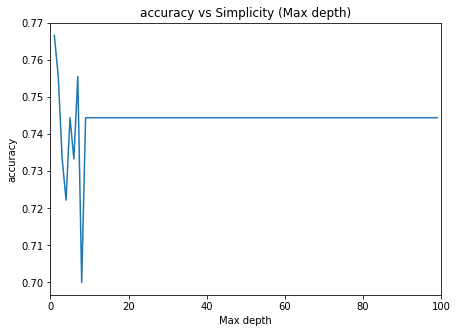

In [19]:
plt.figure(figsize=(7,5))
plt.plot(range(1,100),accuracy)
plt.xlabel("Max depth")
plt.ylabel("accuracy")
plt.title("accuracy vs Simplicity (Max depth)")
plt.xlim(0,100)
plt.show()

In [20]:
param_grid = {'max_depth':np.arange(1,11)}
dt=DecisionTreeClassifier(random_state = 888)
clf=GridSearchCV(dt,param_grid=param_grid)
rs=clf.fit(X_train,y_train)
print (rs.best_params_)
print ("Out of sample accuracy: {:.4f}".format(
    accuracy_score(np.array(y_test),rs.predict(X_test))))

{'max_depth': 2}
Out of sample accuracy: 0.7556


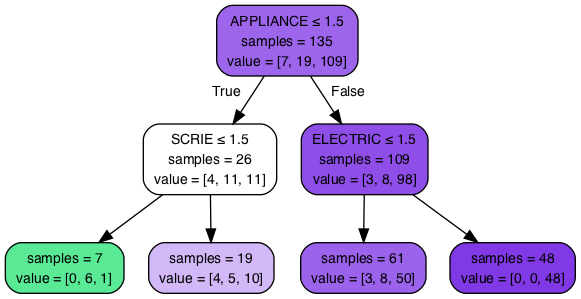

In [21]:
dt=DecisionTreeClassifier(max_depth=2, random_state = 888)
dt.fit(X_train,y_train)

thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

In [24]:
param_grid = {'max_depth':np.arange(1,12), 'min_samples_leaf':np.arange(1,3)}
rf=RandomForestClassifier(random_state = 888)
clf=GridSearchCV(rf,param_grid=param_grid)
rs=clf.fit(X_train,y_train)
print ("Best hyper-parameters: {}".format(rs.best_params_))

Best hyper-parameters: {'max_depth': 2, 'min_samples_leaf': 1}


In [25]:
clf = RandomForestClassifier(max_depth=rs.best_params_['max_depth'], random_state=888)
rf = clf.fit(X_train, y_train)

In [27]:
print ("Out of sample accuracy: {:.4f}".format(rf.score(X_test, y_test)))

Out of sample accuracy: 0.6889


In [28]:
#Random Forest Feature Importance
clf.feature_importances_

array([0.08608901, 0.        , 0.03892621, 0.05929125, 0.        ,
       0.05272668, 0.06358074, 0.        , 0.        , 0.        ,
       0.0103059 , 0.00263583, 0.04492305, 0.        , 0.04895787,
       0.08534634, 0.        , 0.        , 0.        , 0.23783368,
       0.05276165, 0.        , 0.00222142, 0.1325179 , 0.        ,
       0.        , 0.05119069, 0.03069177, 0.        ])

In [29]:
df.columns

Index(['zipcode', 'DOF_Property_Owner_Issue', 'Building_Use', '_yel',
       'PLUMBING', 'Street_Light_Condition', 'Damaged_Tree',
       'Noise_Residential', 'Traffic_Signal_Condition', 'Sidewalk_Condition',
       'MasterCard', 'General_Construction_Plumbing', 'Taxi_Complaint', '_gre',
       'Noise_Commercial', 'Derelict_Vehicle', '_sub', 'Graffiti',
       'Blocked_Driveway', 'Noise_Street_Sidewalk', 'APPLIANCE',
       '_petit_larceny', '_drugs', 'ELECTRIC', 'SCRIE', 'Street_Condition',
       'Rodent', '_citibike', '_robbery', '_fhv', 'gentrification'],
      dtype='object')

In [31]:
#Random Forest Feature Importance
d = {'Features': np.asarray(df.columns[1:-1]), 
     'Feature importance': np.asarray(clf.feature_importances_),
     'Feature type': ['311','311','transportation','311','311','311',
                 '311','311','311','mastercard','311','311','transportation',
                 '311','311','transportation','311','311','311','311','crime',
                 'crime','311','311','311','311','transportation','crime',
                 'transportation']}
df = pd.DataFrame(data=d)
df.sort_values(by='Feature importance', ascending=False, inplace=True)
df

,Feature importance,Feature type,Features
19,0.237834,311,APPLIANCE
23,0.132518,311,SCRIE
0,0.086089,311,DOF_Property_Owner_Issue
15,0.085346,transportation,_sub
6,0.063581,311,Noise_Residential
3,0.059291,311,PLUMBING
20,0.052762,crime,_petit_larceny
5,0.052727,311,Damaged_Tree
26,0.051191,transportation,_citibike
14,0.048958,311,Derelict_Vehicle


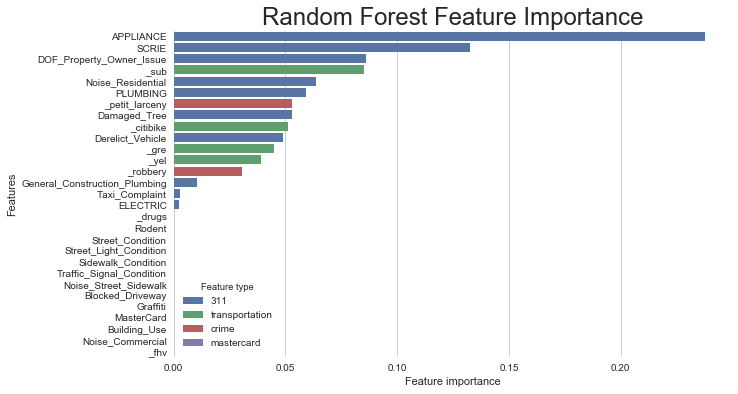

In [34]:
#plot the feature importance of Random Forest
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(10, 6))
sns.set_color_codes("muted")
sns.barplot(x="Feature importance", y="Features", data=df, hue="Feature type", dodge=False)

sns.despine(left=True, bottom=True)
#plt.savefig('featurerank', dpi=500, transparent=False, bbox_inches='tight')
plt.title("Random Forest Feature Importance", fontsize=24)
plt.show()